# Experiments for the marker morphologies

## dataset sorting
### load in the data from kaggle

In [ ]:
import kagglehub
import subprocess
#to import the data we will use the open datasets library #we place the link copied from Kaggle into the parameter of the download function
#pathB = kagglehub.dataset_download("dextershepherd/tactip-alternative-morphology-b")
#pathnm = kagglehub.dataset_download("dextershepherd/no-marker-tactip-only-glare")
pathA = kagglehub.dataset_download("dextershepherd/tactip-morphology-a-texture")
print("Path to dataset files:", pathA)
result = subprocess.run(["mv", pathA, "/mnt/data0/drs25/data/"], capture_output=True, text=True)

# Download latest version
pathA="/mnt/data0/drs25/data/"

### convert it all

In [2]:
from convert.convert_data import *
pathA="/mnt/data0/drs25/data/"
save_path="/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/"
final_data,final_labels=load_files_memory_efficient(pathA+"/")
#result = subprocess.run(["rm -f", pathA], capture_output=True, text=True)
#final_data=np.load(pathnm+"/X_data_nomarker.npz")['arr_0']
#final_labels=np.load(pathnm+"/y_data_nomarker.npz")['arr_0']
import numpy as np
np.save(save_path+"X_data_morphoholyA",final_data)
np.save(save_path+"y_data_morphoholyA",final_labels)

{'carpet': 0, 'lacedmatt': 1, 'wool': 2, 'cork': 3, 'felt': 4, 'longcarpet': 5, 'cotton': 6, 'plastic': 7, 'flat': 8, 'foamf': 9, 'foamg': 10, 'bubble': 11, 'foame': 12, 'jeans': 13, 'leather': 14} []


IndexError: list index out of range

### Load

In [11]:
import numpy as np
save_path="/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/"

XB=np.load(save_path+"X_data_morphoholyA.npy").astype(np.uint8)#.reshape((41*200,20,355,328))
yB=np.load(save_path+"y_data_morphoholyA.npy").astype(np.uint8)#.reshape((-1,1))
print(XB.shape)

(4600, 20, 355, 328)


In [12]:
mask = np.any(XB != 0, axis=(1, 2, 3))
XB = XB[mask]
yB = yB[mask]
print(XB.shape)
mask = np.any(XB != 1, axis=(1, 2, 3))
XB = XB[mask]
yB = yB[mask]
print(XB.shape)

(2300, 20, 355, 328)
(2300, 20, 355, 328)


In [6]:
print(XB.shape,yB.shape)

(3000, 20, 110, 120) (3000,)


### Validate 

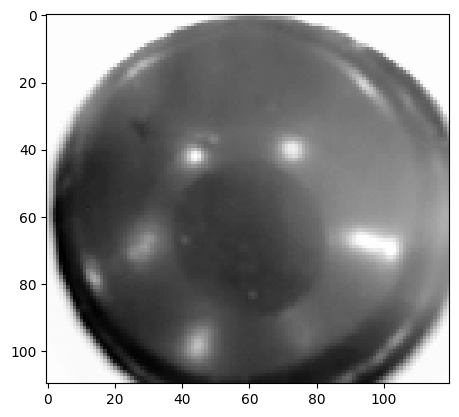

[5 5 5 ... 9 9 9]


In [7]:
import matplotlib.pyplot as plt

plt.imshow(XB[0][0],cmap="gray")
plt.show()
print(yB)

## modelling

In [9]:
import torch
torch.cuda.empty_cache()
from models import *
from data_loader import * 
from data_format import *
from datapath import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
XB_accuracy=[]

data=data_example(XB[:4000,:18:2,:,:],yB)
data.resize(0.6)
data.applySobel()
try:
    XB_accuracy=list(np.asarray(np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10.npy")))
    last_point=len(XB_accuracy)
except:
    last_point=0
print("----",last_point)

for i in range(last_point,10):
    try:
        del train_loader,test_loader #housekeeping
    except:
        pass
    torch.cuda.empty_cache()
    train_loader,test_loader=org_data(data,(len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
    model,history=run(train_loader,0,9,num_epochs = 100)
    XB_accuracy.append([calc(model,test_loader),calc(model,train_loader)])
    np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10",np.array(XB_accuracy))

XB_accuracy=np.array(XB_accuracy)

np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10",XB_accuracy)

---- 10
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0575
Epoch [11/100], Step [48/48], Loss: 121.0958
Epoch [21/100], Step [48/48], Loss: 41.7227
Epoch [31/100], Step [48/48], Loss: 17.6156
Epoch [41/100], Step [48/48], Loss: 8.9558
Epoch [51/100], Step [48/48], Loss: 5.6709
Epoch [61/100], Step [48/48], Loss: 3.8185
Epoch [71/100], Step [48/48], Loss: 2.4383
Epoch [81/100], Step [48/48], Loss: 1.5549
Epoch [91/100], Step [48/48], Loss: 0.8738
Finished Training
Accuracy: 98.31694717547074 %
Accuracy: 99.1625348943794 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9948
Epoch [11/100], Step [48/48], Loss: 97.6976
Epoch [21/100], Step [48/48], Loss: 37.4765
Epoch [31/100], Step [48/48], Loss: 18.1797
Epoch [41/100], Step [48/48], Loss: 10.1112
Epoch [51/100], Step [48/48], Loss: 6.8871
Epoch [61/100], Step [48/48], Loss: 4.6148
Epoch [71/100], Step [48/48], Loss: 3.3180
Epoch [81/100], Step [48/48], Loss: 2.2444
Epoch [91/100], Step [48/48], Loss: 1.2764
Finished Training
Accuracy: 99.81669721713048 %
Accuracy: 99.32919461689097 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0695
Epoch [11/100], Step [48/48], Loss: 128.7337
Epoch [21/100], Step [48/48], Loss: 77.5933
Epoch [31/100], Step [48/48], Loss: 28.5998
Epoch [41/100], Step [48/48], Loss: 14.0797
Epoch [51/100], Step [48/48], Loss: 8.2876
Epoch [61/100], Step [48/48], Loss: 5.5972
Epoch [71/100], Step [48/48], Loss: 3.8555
Epoch [81/100], Step [48/48], Loss: 2.6421
Epoch [91/100], Step [48/48], Loss: 1.2770
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.53751927003042 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9579
Epoch [11/100], Step [48/48], Loss: 110.0043
Epoch [21/100], Step [48/48], Loss: 40.0674
Epoch [31/100], Step [48/48], Loss: 17.9752
Epoch [41/100], Step [48/48], Loss: 10.7425
Epoch [51/100], Step [48/48], Loss: 6.9822
Epoch [61/100], Step [48/48], Loss: 4.8617
Epoch [71/100], Step [48/48], Loss: 2.6969
Epoch [81/100], Step [48/48], Loss: 2.3542
Epoch [91/100], Step [48/48], Loss: 1.6694
Finished Training
Accuracy: 99.48341943009498 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9791
Epoch [11/100], Step [48/48], Loss: 126.2596
Epoch [21/100], Step [48/48], Loss: 57.3648
Epoch [31/100], Step [48/48], Loss: 29.2725
Epoch [41/100], Step [48/48], Loss: 15.6609
Epoch [51/100], Step [48/48], Loss: 9.5057
Epoch [61/100], Step [48/48], Loss: 6.3779
Epoch [71/100], Step [48/48], Loss: 5.0189
Epoch [81/100], Step [48/48], Loss: 3.2351
Epoch [91/100], Step [48/48], Loss: 2.1166
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9381
Epoch [11/100], Step [48/48], Loss: 103.9806
Epoch [21/100], Step [48/48], Loss: 38.2169
Epoch [31/100], Step [48/48], Loss: 17.3910
Epoch [41/100], Step [48/48], Loss: 10.0341
Epoch [51/100], Step [48/48], Loss: 6.7303
Epoch [61/100], Step [48/48], Loss: 4.0266
Epoch [71/100], Step [48/48], Loss: 3.3106
Epoch [81/100], Step [48/48], Loss: 1.9432
Epoch [91/100], Step [48/48], Loss: 1.1129
Finished Training
Accuracy: 99.65005832361273 %
Accuracy: 99.99583350693722 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0018
Epoch [11/100], Step [48/48], Loss: 128.0830
Epoch [21/100], Step [48/48], Loss: 65.4874
Epoch [31/100], Step [48/48], Loss: 29.7112
Epoch [41/100], Step [48/48], Loss: 15.7688
Epoch [51/100], Step [48/48], Loss: 9.5225
Epoch [61/100], Step [48/48], Loss: 6.3038
Epoch [71/100], Step [48/48], Loss: 4.4601
Epoch [81/100], Step [48/48], Loss: 3.1352
Epoch [91/100], Step [48/48], Loss: 2.3125
Finished Training
Accuracy: 98.65022496250624 %
Accuracy: 98.91254531061206 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0040
Epoch [11/100], Step [48/48], Loss: 116.6256
Epoch [21/100], Step [48/48], Loss: 40.1505
Epoch [31/100], Step [48/48], Loss: 17.5113
Epoch [41/100], Step [48/48], Loss: 10.0449
Epoch [51/100], Step [48/48], Loss: 6.1522
Epoch [61/100], Step [48/48], Loss: 4.0587
Epoch [71/100], Step [48/48], Loss: 2.8865
Epoch [81/100], Step [48/48], Loss: 1.9800
Epoch [91/100], Step [48/48], Loss: 1.5527
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9363
Epoch [11/100], Step [48/48], Loss: 95.9567
Epoch [21/100], Step [48/48], Loss: 41.2980
Epoch [31/100], Step [48/48], Loss: 20.4947
Epoch [41/100], Step [48/48], Loss: 11.8482
Epoch [51/100], Step [48/48], Loss: 7.6267
Epoch [61/100], Step [48/48], Loss: 5.3991
Epoch [71/100], Step [48/48], Loss: 3.3928
Epoch [81/100], Step [48/48], Loss: 2.4133
Epoch [91/100], Step [48/48], Loss: 2.5911
Finished Training
Accuracy: 99.98333611064822 %
Accuracy: 99.87083871505355 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0003
Epoch [11/100], Step [48/48], Loss: 107.4870
Epoch [21/100], Step [48/48], Loss: 42.4723
Epoch [31/100], Step [48/48], Loss: 20.2565
Epoch [41/100], Step [48/48], Loss: 11.6392
Epoch [51/100], Step [48/48], Loss: 7.5316
Epoch [61/100], Step [48/48], Loss: 4.9702
Epoch [71/100], Step [48/48], Loss: 3.9848
Epoch [81/100], Step [48/48], Loss: 2.6354
Epoch [91/100], Step [48/48], Loss: 1.7498
Finished Training
Accuracy: 99.48341943009498 %
Accuracy: 99.87083871505355 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0221
Epoch [11/100], Step [48/48], Loss: 115.8643
Epoch [21/100], Step [48/48], Loss: 44.0536
Epoch [31/100], Step [48/48], Loss: 20.3903
Epoch [41/100], Step [48/48], Loss: 10.8387
Epoch [51/100], Step [48/48], Loss: 6.8594
Epoch [61/100], Step [48/48], Loss: 4.6850
Epoch [71/100], Step [48/48], Loss: 2.6410
Epoch [81/100], Step [48/48], Loss: 2.2402
Epoch [91/100], Step [48/48], Loss: 1.5238
Finished Training
Accuracy: 99.65005832361273 %
Accuracy: 99.91250364568144 %


## evaluation

In [28]:
XB_=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XA_accuracy_10.npy")[1:]
print(XB_)
Av_XB_test=np.average(XB_,axis=0)[0]
Av_XB_train=np.average(XB_,axis=0)[1]
std_XB_test=np.std(XB_[:,0])
print("Average XA test:",Av_XB_test)
print("Average XA train:",Av_XB_train)
print(f"std XB test:{std_XB_test:.5}")


[[0.97587481 0.99233737]
 [0.98022169 0.97657736]
 [0.96066073 0.97820771]
 [0.98022169 0.98581599]
 [0.95196696 0.9581001 ]
 [0.97804825 0.98581599]
 [0.97370137 0.97603391]
 [0.97152793 0.98690289]
 [0.97152793 0.98690289]]
Average XA test: 0.9715279287111497
Average XA train: 0.9807438001557887
std XB test:0.008932


In [6]:
np.unique(data.y)

array([ 3,  4,  6,  8,  9, 10, 11, 12], dtype=uint8)

## Map

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


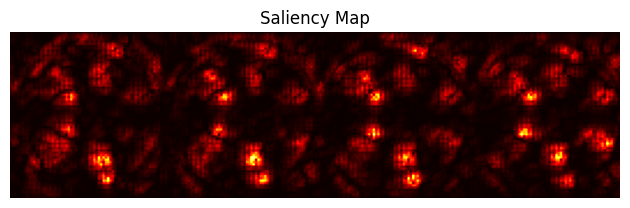

In [10]:
data=data_example(XB[0:10,:18:2,:,:],yB)
data.resize(0.6)
data.applySobel()
images = data.X.reshape((len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
images=(images-np.min(images))/(np.max(images)-np.min(images))
input_tensor = torch.tensor(images.astype(np.float64)).clone().detach()
input_tensor.requires_grad = True

output = model(input_tensor.float().to(device))
print(output.cpu().argmax(dim=1))
target_class = output.cpu().argmax(dim=1)[0].item() 

model.zero_grad()
output[0, target_class].backward()
saliency = input_tensor.grad.data.abs()

import matplotlib.pyplot as plt

saliency_map = saliency.squeeze().max(dim=0)[0].numpy()  # collapse RGB
plt.imshow(saliency_map.T[:,data.X.shape[-2]:data.X.shape[-2]*5], cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.tight_layout()
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/0_MAP.pdf")
plt.show()

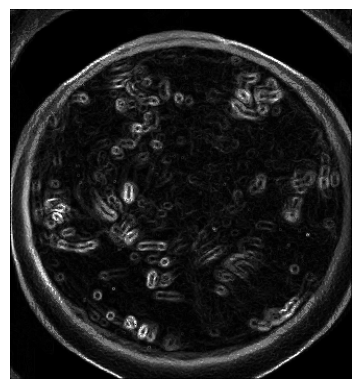

In [22]:
from models import *
from data_loader import * 
from data_format import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
data=data_example(XB[0:10,:7,:,:],yB)
data.applySobel()
plt.imshow(data.X[0][0],cmap="gray")
plt.axis("off")
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/0.png")
plt.show()

## resolution 

In [13]:
import torch
torch.cuda.empty_cache()
from models import *
from data_loader import * 
from data_format import *
from datapath import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
XB_accuracy=[]

filename="XA_accuracy_res.npy"
try:
    XB_accuracy=list(np.asarray(np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename)))
    last_point=len(XB_accuracy)-1
except:
    last_point=0
print("----",last_point)
move=len(np.arange(0.05,1,0.05))
for j,res in enumerate(np.arange(0.05,1,0.05)):
    a=[]
    data=data_example(XB[:4000,:18:2,:,:],yB)
    data.resize(res)
    data.applySobel()
    for i in range(5):
        print("***********************************\n\n\n")
        print("Percentage:",(i+(((j-1)*5)))/(5*move) *100,"%")
        print("***********************************\n\n\n")
        try:
            del train_loader,test_loader #housekeeping
        except:
            pass
        torch.cuda.empty_cache()
        train_loader,test_loader=org_data(data,(len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
        model,history=run(train_loader,0,9,num_epochs = 100)
        a.append([calc(model,test_loader),calc(model,train_loader)])
    XB_accuracy.append(a)
    np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename,np.array(XB_accuracy))

XB_accuracy=np.array(XB_accuracy)

np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename,XB_accuracy)

---- 0
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0418


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.7190
Epoch [21/100], Step [37/37], Loss: 91.4662
Epoch [31/100], Step [37/37], Loss: 91.1841
Epoch [41/100], Step [37/37], Loss: 90.7806
Epoch [51/100], Step [37/37], Loss: 90.0040
Epoch [61/100], Step [37/37], Loss: 87.6626
Epoch [71/100], Step [37/37], Loss: 77.3893
Epoch [81/100], Step [37/37], Loss: 59.3416
Epoch [91/100], Step [37/37], Loss: 42.1868
Finished Training
Accuracy: 69.33275374918496 %
Accuracy: 69.72447149611435 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 91.9883


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.6408
Epoch [21/100], Step [37/37], Loss: 91.3445
Epoch [31/100], Step [37/37], Loss: 90.9428
Epoch [41/100], Step [37/37], Loss: 90.2632
Epoch [51/100], Step [37/37], Loss: 88.6267
Epoch [61/100], Step [37/37], Loss: 82.7185
Epoch [71/100], Step [37/37], Loss: 65.9493
Epoch [81/100], Step [37/37], Loss: 49.4436
Epoch [91/100], Step [37/37], Loss: 35.9087
Finished Training
Accuracy: 65.42056074766354 %
Accuracy: 71.0830933101462 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0160


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.8163
Epoch [21/100], Step [37/37], Loss: 91.6564
Epoch [31/100], Step [37/37], Loss: 91.5136
Epoch [41/100], Step [37/37], Loss: 91.3608
Epoch [51/100], Step [37/37], Loss: 91.1715
Epoch [61/100], Step [37/37], Loss: 90.9145
Epoch [71/100], Step [37/37], Loss: 90.4626
Epoch [81/100], Step [37/37], Loss: 89.4871
Epoch [91/100], Step [37/37], Loss: 86.7092
Finished Training
Accuracy: 30.428167789610956 %
Accuracy: 30.32443888919081 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 91.8556


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.5805
Epoch [21/100], Step [37/37], Loss: 91.3794
Epoch [31/100], Step [37/37], Loss: 91.1851
Epoch [41/100], Step [37/37], Loss: 90.9380
Epoch [51/100], Step [37/37], Loss: 90.5493
Epoch [61/100], Step [37/37], Loss: 89.8264
Epoch [71/100], Step [37/37], Loss: 87.9667
Epoch [81/100], Step [37/37], Loss: 81.4274
Epoch [91/100], Step [37/37], Loss: 67.6980
Finished Training
Accuracy: 47.59834818517713 %
Accuracy: 50.86680071735232 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0913


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.6489
Epoch [21/100], Step [37/37], Loss: 91.3048
Epoch [31/100], Step [37/37], Loss: 90.9229
Epoch [41/100], Step [37/37], Loss: 90.3841
Epoch [51/100], Step [37/37], Loss: 89.2584
Epoch [61/100], Step [37/37], Loss: 85.3618
Epoch [71/100], Step [37/37], Loss: 70.8588
Epoch [81/100], Step [37/37], Loss: 54.9341
Epoch [91/100], Step [37/37], Loss: 36.8571
Finished Training
Accuracy: 72.37557052814606 %
Accuracy: 75.48502798760937 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9944
Epoch [11/100], Step [37/37], Loss: 91.4479
Epoch [21/100], Step [37/37], Loss: 90.9229
Epoch [31/100], Step [37/37], Loss: 89.6730
Epoch [41/100], Step [37/37], Loss: 82.2952
Epoch [51/100], Step [37/37], Loss: 55.5956
Epoch [61/100], Step [37/37], Loss: 32.7172
Epoch [71/100], Step [37/37], Loss: 22.8145
Epoch [81/100], Step [37/37], Loss: 17.6907
Epoch [91/100], Step [37/37], Loss: 15.3150
Finished Training
Accuracy: 86.7202782003912 %
Accuracy: 84.72365632302593 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9659
Epoch [11/100], Step [37/37], Loss: 91.3467
Epoch [21/100], Step [37/37], Loss: 90.6060
Epoch [31/100], Step [37/37], Loss: 88.6098
Epoch [41/100], Step [37/37], Loss: 74.3571
Epoch [51/100], Step [37/37], Loss: 46.6355
Epoch [61/100], Step [37/37], Loss: 26.7391
Epoch [71/100], Step [37/37], Loss: 19.7789
Epoch [81/100], Step [37/37], Loss: 15.8864
Epoch [91/100], Step [37/37], Loss: 13.0074
Finished Training
Accuracy: 90.63247120191262 %
Accuracy: 88.90821151024402 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8271
Epoch [11/100], Step [37/37], Loss: 91.3861
Epoch [21/100], Step [37/37], Loss: 90.8162
Epoch [31/100], Step [37/37], Loss: 89.3563
Epoch [41/100], Step [37/37], Loss: 80.2040
Epoch [51/100], Step [37/37], Loss: 47.0191
Epoch [61/100], Step [37/37], Loss: 26.9056
Epoch [71/100], Step [37/37], Loss: 19.3174
Epoch [81/100], Step [37/37], Loss: 15.1239
Epoch [91/100], Step [37/37], Loss: 13.7068
Finished Training
Accuracy: 85.41621386655075 %
Accuracy: 89.45166023585675 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8912
Epoch [11/100], Step [37/37], Loss: 91.2915
Epoch [21/100], Step [37/37], Loss: 90.4675
Epoch [31/100], Step [37/37], Loss: 87.8248
Epoch [41/100], Step [37/37], Loss: 68.2041
Epoch [51/100], Step [37/37], Loss: 35.8268
Epoch [61/100], Step [37/37], Loss: 22.2832
Epoch [71/100], Step [37/37], Loss: 17.0975
Epoch [81/100], Step [37/37], Loss: 14.7839
Epoch [91/100], Step [37/37], Loss: 12.8666
Finished Training
Accuracy: 88.24168658987176 %
Accuracy: 86.08227813705778 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0001
Epoch [11/100], Step [37/37], Loss: 91.4684
Epoch [21/100], Step [37/37], Loss: 90.7565
Epoch [31/100], Step [37/37], Loss: 88.8944
Epoch [41/100], Step [37/37], Loss: 73.2188
Epoch [51/100], Step [37/37], Loss: 44.0705
Epoch [61/100], Step [37/37], Loss: 28.2079
Epoch [71/100], Step [37/37], Loss: 20.8578
Epoch [81/100], Step [37/37], Loss: 16.9762
Epoch [91/100], Step [37/37], Loss: 14.7554
Finished Training
Accuracy: 86.93762225603129 %
Accuracy: 86.40834737242542 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0068
Epoch [11/100], Step [37/37], Loss: 91.2231
Epoch [21/100], Step [37/37], Loss: 90.1754
Epoch [31/100], Step [37/37], Loss: 81.1597
Epoch [41/100], Step [37/37], Loss: 42.6134
Epoch [51/100], Step [37/37], Loss: 26.5275
Epoch [61/100], Step [37/37], Loss: 20.0204
Epoch [71/100], Step [37/37], Loss: 16.2752
Epoch [81/100], Step [37/37], Loss: 14.3159
Epoch [91/100], Step [37/37], Loss: 11.6989
Finished Training
Accuracy: 86.50293414475114 %
Accuracy: 85.97358839193522 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8471
Epoch [11/100], Step [37/37], Loss: 90.1153
Epoch [21/100], Step [37/37], Loss: 66.5666
Epoch [31/100], Step [37/37], Loss: 35.8909
Epoch [41/100], Step [37/37], Loss: 24.8692
Epoch [51/100], Step [37/37], Loss: 20.1456
Epoch [61/100], Step [37/37], Loss: 17.4756
Epoch [71/100], Step [37/37], Loss: 14.8810
Epoch [81/100], Step [37/37], Loss: 13.3888
Epoch [91/100], Step [37/37], Loss: 12.1790
Finished Training
Accuracy: 85.8509019778309 %
Accuracy: 82.9302755285039 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9424
Epoch [11/100], Step [37/37], Loss: 90.4704
Epoch [21/100], Step [37/37], Loss: 69.0924
Epoch [31/100], Step [37/37], Loss: 38.0453
Epoch [41/100], Step [37/37], Loss: 26.0747
Epoch [51/100], Step [37/37], Loss: 21.0906
Epoch [61/100], Step [37/37], Loss: 16.9247
Epoch [71/100], Step [37/37], Loss: 15.0565
Epoch [81/100], Step [37/37], Loss: 14.3254
Epoch [91/100], Step [37/37], Loss: 12.2188
Finished Training
Accuracy: 82.8080851988698 %
Accuracy: 85.2127601760774 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.1027
Epoch [11/100], Step [37/37], Loss: 90.7757
Epoch [21/100], Step [37/37], Loss: 76.3028
Epoch [31/100], Step [37/37], Loss: 36.9597
Epoch [41/100], Step [37/37], Loss: 25.2141
Epoch [51/100], Step [37/37], Loss: 20.5138
Epoch [61/100], Step [37/37], Loss: 16.9957
Epoch [71/100], Step [37/37], Loss: 14.6218
Epoch [81/100], Step [37/37], Loss: 12.5723
Epoch [91/100], Step [37/37], Loss: 11.6483
Finished Training
Accuracy: 88.02434253423168 %
Accuracy: 89.7777294712244 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9212
Epoch [11/100], Step [37/37], Loss: 91.2317
Epoch [21/100], Step [37/37], Loss: 89.5170
Epoch [31/100], Step [37/37], Loss: 67.3966
Epoch [41/100], Step [37/37], Loss: 36.1768
Epoch [51/100], Step [37/37], Loss: 24.9901
Epoch [61/100], Step [37/37], Loss: 18.9759
Epoch [71/100], Step [37/37], Loss: 15.9226
Epoch [81/100], Step [37/37], Loss: 14.4453
Epoch [91/100], Step [37/37], Loss: 12.2526
Finished Training
Accuracy: 88.02434253423168 %
Accuracy: 89.39731536329548 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8874
Epoch [11/100], Step [37/37], Loss: 82.8050
Epoch [21/100], Step [37/37], Loss: 35.5706
Epoch [31/100], Step [37/37], Loss: 21.3872
Epoch [41/100], Step [37/37], Loss: 16.2728
Epoch [51/100], Step [37/37], Loss: 13.4405
Epoch [61/100], Step [37/37], Loss: 11.7835
Epoch [71/100], Step [37/37], Loss: 10.1945
Epoch [81/100], Step [37/37], Loss: 9.4368
Epoch [91/100], Step [37/37], Loss: 8.8254
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 90.70159230476605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9605
Epoch [11/100], Step [37/37], Loss: 75.3339
Epoch [21/100], Step [37/37], Loss: 34.4851
Epoch [31/100], Step [37/37], Loss: 23.4310
Epoch [41/100], Step [37/37], Loss: 18.3642
Epoch [51/100], Step [37/37], Loss: 15.2619
Epoch [61/100], Step [37/37], Loss: 13.5936
Epoch [71/100], Step [37/37], Loss: 12.2554
Epoch [81/100], Step [37/37], Loss: 11.3839
Epoch [91/100], Step [37/37], Loss: 9.7673
Finished Training
Accuracy: 84.32949358835036 %
Accuracy: 88.63648714743765 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0106
Epoch [11/100], Step [37/37], Loss: 90.6118
Epoch [21/100], Step [37/37], Loss: 62.0405
Epoch [31/100], Step [37/37], Loss: 32.0187
Epoch [41/100], Step [37/37], Loss: 20.6435
Epoch [51/100], Step [37/37], Loss: 16.3939
Epoch [61/100], Step [37/37], Loss: 13.7833
Epoch [71/100], Step [37/37], Loss: 12.3691
Epoch [81/100], Step [37/37], Loss: 10.4501
Epoch [91/100], Step [37/37], Loss: 9.8865
Finished Training
Accuracy: 89.7630949793523 %
Accuracy: 90.97331666757242 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9158
Epoch [11/100], Step [37/37], Loss: 90.3756
Epoch [21/100], Step [37/37], Loss: 65.6259
Epoch [31/100], Step [37/37], Loss: 29.8756
Epoch [41/100], Step [37/37], Loss: 20.8600
Epoch [51/100], Step [37/37], Loss: 16.8727
Epoch [61/100], Step [37/37], Loss: 14.0646
Epoch [71/100], Step [37/37], Loss: 12.2518
Epoch [81/100], Step [37/37], Loss: 10.8462
Epoch [91/100], Step [37/37], Loss: 9.1394
Finished Training
Accuracy: 85.19886981091067 %
Accuracy: 87.2778653334058 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0316
Epoch [11/100], Step [37/37], Loss: 90.7154
Epoch [21/100], Step [37/37], Loss: 71.5081
Epoch [31/100], Step [37/37], Loss: 32.4666
Epoch [41/100], Step [37/37], Loss: 20.6587
Epoch [51/100], Step [37/37], Loss: 15.5789
Epoch [61/100], Step [37/37], Loss: 12.7682
Epoch [71/100], Step [37/37], Loss: 11.3213
Epoch [81/100], Step [37/37], Loss: 9.7754
Epoch [91/100], Step [37/37], Loss: 9.1184
Finished Training
Accuracy: 88.67637470115191 %
Accuracy: 89.28862561817293 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9848
Epoch [11/100], Step [37/37], Loss: 73.4569
Epoch [21/100], Step [37/37], Loss: 30.0900
Epoch [31/100], Step [37/37], Loss: 19.8961
Epoch [41/100], Step [37/37], Loss: 15.7898
Epoch [51/100], Step [37/37], Loss: 13.1129
Epoch [61/100], Step [37/37], Loss: 11.4802
Epoch [71/100], Step [37/37], Loss: 10.2925
Epoch [81/100], Step [37/37], Loss: 8.7411
Epoch [91/100], Step [37/37], Loss: 7.7249
Finished Training
Accuracy: 90.8498152575527 %
Accuracy: 90.04945383403077 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0217
Epoch [11/100], Step [37/37], Loss: 81.5032
Epoch [21/100], Step [37/37], Loss: 34.2346
Epoch [31/100], Step [37/37], Loss: 21.3944
Epoch [41/100], Step [37/37], Loss: 16.2903
Epoch [51/100], Step [37/37], Loss: 13.8089
Epoch [61/100], Step [37/37], Loss: 11.5903
Epoch [71/100], Step [37/37], Loss: 10.8430
Epoch [81/100], Step [37/37], Loss: 8.5678
Epoch [91/100], Step [37/37], Loss: 8.0663
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 93.14711157002338 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0436
Epoch [11/100], Step [37/37], Loss: 84.5890
Epoch [21/100], Step [37/37], Loss: 36.6324
Epoch [31/100], Step [37/37], Loss: 24.1956
Epoch [41/100], Step [37/37], Loss: 17.3748
Epoch [51/100], Step [37/37], Loss: 14.8254
Epoch [61/100], Step [37/37], Loss: 12.9615
Epoch [71/100], Step [37/37], Loss: 11.4347
Epoch [81/100], Step [37/37], Loss: 10.1334
Epoch [91/100], Step [37/37], Loss: 9.5358
Finished Training
Accuracy: 83.46011736579004 %
Accuracy: 89.01690125536656 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7735
Epoch [11/100], Step [37/37], Loss: 67.8149
Epoch [21/100], Step [37/37], Loss: 29.2799
Epoch [31/100], Step [37/37], Loss: 18.9727
Epoch [41/100], Step [37/37], Loss: 15.1035
Epoch [51/100], Step [37/37], Loss: 12.8268
Epoch [61/100], Step [37/37], Loss: 11.3083
Epoch [71/100], Step [37/37], Loss: 9.6957
Epoch [81/100], Step [37/37], Loss: 8.7693
Epoch [91/100], Step [37/37], Loss: 8.0594
Finished Training
Accuracy: 91.50184742447294 %
Accuracy: 90.70159230476605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7516
Epoch [11/100], Step [37/37], Loss: 69.4913
Epoch [21/100], Step [37/37], Loss: 32.4877
Epoch [31/100], Step [37/37], Loss: 21.2782
Epoch [41/100], Step [37/37], Loss: 16.7667
Epoch [51/100], Step [37/37], Loss: 13.6297
Epoch [61/100], Step [37/37], Loss: 11.6812
Epoch [71/100], Step [37/37], Loss: 11.4085
Epoch [81/100], Step [37/37], Loss: 9.4732
Epoch [91/100], Step [37/37], Loss: 8.9990
Finished Training
Accuracy: 92.15387959139318 %
Accuracy: 91.57111026574644 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9188
Epoch [11/100], Step [37/37], Loss: 85.6036
Epoch [21/100], Step [37/37], Loss: 32.5539
Epoch [31/100], Step [37/37], Loss: 19.7587
Epoch [41/100], Step [37/37], Loss: 15.7838
Epoch [51/100], Step [37/37], Loss: 13.0832
Epoch [61/100], Step [37/37], Loss: 11.4743
Epoch [71/100], Step [37/37], Loss: 9.4822
Epoch [81/100], Step [37/37], Loss: 8.3598
Epoch [91/100], Step [37/37], Loss: 7.8511
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 92.76669746209446 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7821
Epoch [11/100], Step [37/37], Loss: 58.9251
Epoch [21/100], Step [37/37], Loss: 28.3281
Epoch [31/100], Step [37/37], Loss: 20.1477
Epoch [41/100], Step [37/37], Loss: 16.1712
Epoch [51/100], Step [37/37], Loss: 13.7464
Epoch [61/100], Step [37/37], Loss: 11.9577
Epoch [71/100], Step [37/37], Loss: 10.5473
Epoch [81/100], Step [37/37], Loss: 9.4831
Epoch [91/100], Step [37/37], Loss: 8.2051
Finished Training
Accuracy: 93.45794392523365 %
Accuracy: 92.49497309928809 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9644
Epoch [11/100], Step [37/37], Loss: 79.8132
Epoch [21/100], Step [37/37], Loss: 35.2960
Epoch [31/100], Step [37/37], Loss: 22.7717
Epoch [41/100], Step [37/37], Loss: 16.6631
Epoch [51/100], Step [37/37], Loss: 13.8264
Epoch [61/100], Step [37/37], Loss: 12.1869
Epoch [71/100], Step [37/37], Loss: 10.4999
Epoch [81/100], Step [37/37], Loss: 9.6320
Epoch [91/100], Step [37/37], Loss: 8.2780
Finished Training
Accuracy: 92.58856770267333 %
Accuracy: 90.75593717732733 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8077
Epoch [11/100], Step [37/37], Loss: 46.9762
Epoch [21/100], Step [37/37], Loss: 24.6325
Epoch [31/100], Step [37/37], Loss: 18.2250
Epoch [41/100], Step [37/37], Loss: 15.0358
Epoch [51/100], Step [37/37], Loss: 12.5623
Epoch [61/100], Step [37/37], Loss: 11.9750
Epoch [71/100], Step [37/37], Loss: 9.8622
Epoch [81/100], Step [37/37], Loss: 8.9544
Epoch [91/100], Step [37/37], Loss: 6.9752
Finished Training
Accuracy: 91.28450336883286 %
Accuracy: 93.74490516819739 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7950
Epoch [11/100], Step [37/37], Loss: 44.7102
Epoch [21/100], Step [37/37], Loss: 24.0508
Epoch [31/100], Step [37/37], Loss: 17.4570
Epoch [41/100], Step [37/37], Loss: 14.0624
Epoch [51/100], Step [37/37], Loss: 13.0406
Epoch [61/100], Step [37/37], Loss: 10.2912
Epoch [71/100], Step [37/37], Loss: 10.2153
Epoch [81/100], Step [37/37], Loss: 8.4099
Epoch [91/100], Step [37/37], Loss: 7.7032
Finished Training
Accuracy: 93.8926320365138 %
Accuracy: 93.58187055051357 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7281
Epoch [11/100], Step [37/37], Loss: 49.5775
Epoch [21/100], Step [37/37], Loss: 21.9228
Epoch [31/100], Step [37/37], Loss: 15.5827
Epoch [41/100], Step [37/37], Loss: 12.9522
Epoch [51/100], Step [37/37], Loss: 11.1399
Epoch [61/100], Step [37/37], Loss: 9.5078
Epoch [71/100], Step [37/37], Loss: 8.1552
Epoch [81/100], Step [37/37], Loss: 7.2576
Epoch [91/100], Step [37/37], Loss: 6.3547
Finished Training
Accuracy: 96.50076070419473 %
Accuracy: 97.22297701211892 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8015
Epoch [11/100], Step [37/37], Loss: 64.7070
Epoch [21/100], Step [37/37], Loss: 26.4220
Epoch [31/100], Step [37/37], Loss: 17.6420
Epoch [41/100], Step [37/37], Loss: 13.7971
Epoch [51/100], Step [37/37], Loss: 12.2534
Epoch [61/100], Step [37/37], Loss: 11.3176
Epoch [71/100], Step [37/37], Loss: 9.3617
Epoch [81/100], Step [37/37], Loss: 8.3242
Epoch [91/100], Step [37/37], Loss: 6.8880
Finished Training
Accuracy: 93.02325581395348 %
Accuracy: 93.36449106026848 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7663
Epoch [11/100], Step [37/37], Loss: 56.8332
Epoch [21/100], Step [37/37], Loss: 27.1457
Epoch [31/100], Step [37/37], Loss: 18.2276
Epoch [41/100], Step [37/37], Loss: 14.7381
Epoch [51/100], Step [37/37], Loss: 12.3552
Epoch [61/100], Step [37/37], Loss: 11.3066
Epoch [71/100], Step [37/37], Loss: 9.7611
Epoch [81/100], Step [37/37], Loss: 8.3361
Epoch [91/100], Step [37/37], Loss: 7.3734
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 91.62545513830771 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7741
Epoch [11/100], Step [37/37], Loss: 46.3513
Epoch [21/100], Step [37/37], Loss: 25.0558
Epoch [31/100], Step [37/37], Loss: 17.9671
Epoch [41/100], Step [37/37], Loss: 13.8647
Epoch [51/100], Step [37/37], Loss: 12.3678
Epoch [61/100], Step [37/37], Loss: 10.5408
Epoch [71/100], Step [37/37], Loss: 9.9081
Epoch [81/100], Step [37/37], Loss: 8.2918
Epoch [91/100], Step [37/37], Loss: 7.7453
Finished Training
Accuracy: 89.54575092371223 %
Accuracy: 93.5275256779523 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7749
Epoch [11/100], Step [37/37], Loss: 49.7881
Epoch [21/100], Step [37/37], Loss: 23.5636
Epoch [31/100], Step [37/37], Loss: 16.3132
Epoch [41/100], Step [37/37], Loss: 13.2559
Epoch [51/100], Step [37/37], Loss: 10.8168
Epoch [61/100], Step [37/37], Loss: 9.5430
Epoch [71/100], Step [37/37], Loss: 8.5796
Epoch [81/100], Step [37/37], Loss: 7.7213
Epoch [91/100], Step [37/37], Loss: 6.9484
Finished Training
Accuracy: 94.54466420343404 %
Accuracy: 96.13607956089344 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5748
Epoch [11/100], Step [37/37], Loss: 36.0406
Epoch [21/100], Step [37/37], Loss: 19.2375
Epoch [31/100], Step [37/37], Loss: 14.1179
Epoch [41/100], Step [37/37], Loss: 11.5738
Epoch [51/100], Step [37/37], Loss: 10.4256
Epoch [61/100], Step [37/37], Loss: 8.8447
Epoch [71/100], Step [37/37], Loss: 7.0177
Epoch [81/100], Step [37/37], Loss: 6.4224
Epoch [91/100], Step [37/37], Loss: 5.1727
Finished Training
Accuracy: 93.8926320365138 %
Accuracy: 94.39704363893267 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7317
Epoch [11/100], Step [37/37], Loss: 43.9525
Epoch [21/100], Step [37/37], Loss: 19.8526
Epoch [31/100], Step [37/37], Loss: 13.9115
Epoch [41/100], Step [37/37], Loss: 11.5375
Epoch [51/100], Step [37/37], Loss: 9.5889
Epoch [61/100], Step [37/37], Loss: 7.6493
Epoch [71/100], Step [37/37], Loss: 6.4720
Epoch [81/100], Step [37/37], Loss: 5.3103
Epoch [91/100], Step [37/37], Loss: 4.2767
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 98.14683984566057 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8864
Epoch [11/100], Step [37/37], Loss: 57.6077
Epoch [21/100], Step [37/37], Loss: 23.5349
Epoch [31/100], Step [37/37], Loss: 16.1165
Epoch [41/100], Step [37/37], Loss: 12.8541
Epoch [51/100], Step [37/37], Loss: 10.2922
Epoch [61/100], Step [37/37], Loss: 8.7642
Epoch [71/100], Step [37/37], Loss: 7.5046
Epoch [81/100], Step [37/37], Loss: 6.2024
Epoch [91/100], Step [37/37], Loss: 4.9267
Finished Training
Accuracy: 94.76200825907411 %
Accuracy: 96.24476930601598 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7125
Epoch [11/100], Step [37/37], Loss: 37.8550
Epoch [21/100], Step [37/37], Loss: 19.9289
Epoch [31/100], Step [37/37], Loss: 13.4954
Epoch [41/100], Step [37/37], Loss: 11.7713
Epoch [51/100], Step [37/37], Loss: 9.7016
Epoch [61/100], Step [37/37], Loss: 8.5283
Epoch [71/100], Step [37/37], Loss: 7.8482
Epoch [81/100], Step [37/37], Loss: 6.1798
Epoch [91/100], Step [37/37], Loss: 4.7076
Finished Training
Accuracy: 96.71810475983482 %
Accuracy: 97.8751154828542 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7410
Epoch [11/100], Step [37/37], Loss: 38.6976
Epoch [21/100], Step [37/37], Loss: 19.1662
Epoch [31/100], Step [37/37], Loss: 14.2327
Epoch [41/100], Step [37/37], Loss: 12.3435
Epoch [51/100], Step [37/37], Loss: 9.7631
Epoch [61/100], Step [37/37], Loss: 8.4668
Epoch [71/100], Step [37/37], Loss: 7.7276
Epoch [81/100], Step [37/37], Loss: 6.0739
Epoch [91/100], Step [37/37], Loss: 4.9773
Finished Training
Accuracy: 94.97935231471418 %
Accuracy: 94.07097440356503 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5013
Epoch [11/100], Step [37/37], Loss: 31.3448
Epoch [21/100], Step [37/37], Loss: 16.2503
Epoch [31/100], Step [37/37], Loss: 12.9358
Epoch [41/100], Step [37/37], Loss: 9.9388
Epoch [51/100], Step [37/37], Loss: 8.4817
Epoch [61/100], Step [37/37], Loss: 6.6990
Epoch [71/100], Step [37/37], Loss: 5.3881
Epoch [81/100], Step [37/37], Loss: 4.6865
Epoch [91/100], Step [37/37], Loss: 3.4752
Finished Training
Accuracy: 93.67528798087372 %
Accuracy: 95.8100103255258 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8667
Epoch [11/100], Step [37/37], Loss: 56.4215
Epoch [21/100], Step [37/37], Loss: 23.2849
Epoch [31/100], Step [37/37], Loss: 15.9014
Epoch [41/100], Step [37/37], Loss: 12.4675
Epoch [51/100], Step [37/37], Loss: 10.1330
Epoch [61/100], Step [37/37], Loss: 8.6560
Epoch [71/100], Step [37/37], Loss: 6.8389
Epoch [81/100], Step [37/37], Loss: 5.9455
Epoch [91/100], Step [37/37], Loss: 4.2096
Finished Training
Accuracy: 95.41404042599434 %
Accuracy: 96.02738981577089 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7241
Epoch [11/100], Step [37/37], Loss: 34.1756
Epoch [21/100], Step [37/37], Loss: 19.0877
Epoch [31/100], Step [37/37], Loss: 14.3031
Epoch [41/100], Step [37/37], Loss: 11.6787
Epoch [51/100], Step [37/37], Loss: 9.2574
Epoch [61/100], Step [37/37], Loss: 8.2119
Epoch [71/100], Step [37/37], Loss: 6.8517
Epoch [81/100], Step [37/37], Loss: 5.5287
Epoch [91/100], Step [37/37], Loss: 4.2845
Finished Training
Accuracy: 95.63138448163441 %
Accuracy: 96.02738981577089 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.6206
Epoch [11/100], Step [37/37], Loss: 36.6639
Epoch [21/100], Step [37/37], Loss: 20.2364
Epoch [31/100], Step [37/37], Loss: 14.2155
Epoch [41/100], Step [37/37], Loss: 11.4481
Epoch [51/100], Step [37/37], Loss: 9.2569
Epoch [61/100], Step [37/37], Loss: 7.9624
Epoch [71/100], Step [37/37], Loss: 6.7584
Epoch [81/100], Step [37/37], Loss: 5.6721
Epoch [91/100], Step [37/37], Loss: 4.7294
Finished Training
Accuracy: 98.23951314931536 %
Accuracy: 98.5272539535895 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8156
Epoch [11/100], Step [37/37], Loss: 84.3737
Epoch [21/100], Step [37/37], Loss: 27.5690
Epoch [31/100], Step [37/37], Loss: 14.9691
Epoch [41/100], Step [37/37], Loss: 11.5522
Epoch [51/100], Step [37/37], Loss: 9.3710
Epoch [61/100], Step [37/37], Loss: 7.7101
Epoch [71/100], Step [37/37], Loss: 5.6013
Epoch [81/100], Step [37/37], Loss: 4.7563
Epoch [91/100], Step [37/37], Loss: 3.4461
Finished Training
Accuracy: 94.76200825907411 %
Accuracy: 95.86435519808707 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 177, 164) (2300, 1, 1593, 164)
Using 4.48 GB
torch.Size([2300, 1, 1593, 164])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9836
Epoch [11/100], Step [37/37], Loss: 41.8887
Epoch [21/100], Step [37/37], Loss: 19.4987
Epoch [31/100], Step [37/37], Loss: 13.5826
Epoch [41/100], Step [37/37], Loss: 10.8538
Epoch [51/100], Step [37/37], Loss: 8.9660
Epoch [61/100], Step [37/37], Loss: 7.0942
Epoch [71/100], Step [37/37], Loss: 6.0567
Epoch [81/100], Step [37/37], Loss: 4.7595
Epoch [91/100], Step [37/37], Loss: 4.3214
Finished Training
Accuracy: 97.37013692675505 %
Accuracy: 97.82077061029293 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 177, 164) (2300, 1, 1593, 164)
Using 4.48 GB
torch.Size([2300, 1, 1593, 164])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5851
Epoch [11/100], Step [37/37], Loss: 37.8754
Epoch [21/100], Step [37/37], Loss: 19.3852
Epoch [31/100], Step [37/37], Loss: 13.6189
Epoch [41/100], Step [37/37], Loss: 11.0633
Epoch [51/100], Step [37/37], Loss: 8.8571
Epoch [61/100], Step [37/37], Loss: 7.2574
Epoch [71/100], Step [37/37], Loss: 6.1159
Epoch [81/100], Step [37/37], Loss: 4.9558
Epoch [91/100], Step [37/37], Loss: 4.1046
Finished Training
Accuracy: 91.71919148011301 %
Accuracy: 94.07097440356503 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 177, 164) (2300, 1, 1593, 164)
Using 4.48 GB
torch.Size([2300, 1, 1593, 164])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7957
Epoch [11/100], Step [37/37], Loss: 35.3307
Epoch [21/100], Step [37/37], Loss: 17.0187
Epoch [31/100], Step [37/37], Loss: 13.0295
Epoch [41/100], Step [37/37], Loss: 10.2585
Epoch [51/100], Step [37/37], Loss: 8.5862
Epoch [61/100], Step [37/37], Loss: 6.8252
Epoch [71/100], Step [37/37], Loss: 5.8197
Epoch [81/100], Step [37/37], Loss: 4.4763
Epoch [91/100], Step [37/37], Loss: 3.6167
Finished Training
Accuracy: 95.19669637035426 %
Accuracy: 96.29911417857726 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 177, 164) (2300, 1, 1593, 164)
Using 4.48 GB
torch.Size([2300, 1, 1593, 164])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8293
Epoch [11/100], Step [37/37], Loss: 43.0214
Epoch [21/100], Step [37/37], Loss: 18.6179
Epoch [31/100], Step [37/37], Loss: 12.9135
Epoch [41/100], Step [37/37], Loss: 10.1565
Epoch [51/100], Step [37/37], Loss: 8.2484
Epoch [61/100], Step [37/37], Loss: 6.7769
Epoch [71/100], Step [37/37], Loss: 5.3573
Epoch [81/100], Step [37/37], Loss: 4.2723
Epoch [91/100], Step [37/37], Loss: 3.5188
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 99.39677191456987 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 177, 164) (2300, 1, 1593, 164)
Using 4.48 GB
torch.Size([2300, 1, 1593, 164])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5168
Epoch [11/100], Step [37/37], Loss: 30.6736
Epoch [21/100], Step [37/37], Loss: 16.7860
Epoch [31/100], Step [37/37], Loss: 12.8677
Epoch [41/100], Step [37/37], Loss: 10.3692
Epoch [51/100], Step [37/37], Loss: 8.1693
Epoch [61/100], Step [37/37], Loss: 7.0609
Epoch [71/100], Step [37/37], Loss: 5.6726
Epoch [81/100], Step [37/37], Loss: 4.5242
Epoch [91/100], Step [37/37], Loss: 3.3705
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.1250475517635 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 195, 180) (2300, 1, 1755, 180)
Using 5.41 GB
torch.Size([2300, 1, 1755, 180])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7341
Epoch [11/100], Step [37/37], Loss: 56.0869
Epoch [21/100], Step [37/37], Loss: 21.1108
Epoch [31/100], Step [37/37], Loss: 14.2629
Epoch [41/100], Step [37/37], Loss: 10.9703
Epoch [51/100], Step [37/37], Loss: 8.3971
Epoch [61/100], Step [37/37], Loss: 7.5386
Epoch [71/100], Step [37/37], Loss: 5.9121
Epoch [81/100], Step [37/37], Loss: 4.4873
Epoch [91/100], Step [37/37], Loss: 3.3402
Finished Training
Accuracy: 96.06607259291458 %
Accuracy: 96.89690777675128 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 195, 180) (2300, 1, 1755, 180)
Using 5.41 GB
torch.Size([2300, 1, 1755, 180])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8366
Epoch [11/100], Step [37/37], Loss: 29.3504
Epoch [21/100], Step [37/37], Loss: 16.0091
Epoch [31/100], Step [37/37], Loss: 12.1656
Epoch [41/100], Step [37/37], Loss: 9.8387
Epoch [51/100], Step [37/37], Loss: 8.2111
Epoch [61/100], Step [37/37], Loss: 6.1841
Epoch [71/100], Step [37/37], Loss: 4.9732
Epoch [81/100], Step [37/37], Loss: 3.8371
Epoch [91/100], Step [37/37], Loss: 3.1276
Finished Training
Accuracy: 97.8048250380352 %
Accuracy: 98.47290908102822 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 195, 180) (2300, 1, 1755, 180)
Using 5.41 GB
torch.Size([2300, 1, 1755, 180])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7843
Epoch [11/100], Step [37/37], Loss: 28.1516
Epoch [21/100], Step [37/37], Loss: 14.3839
Epoch [31/100], Step [37/37], Loss: 10.8929
Epoch [41/100], Step [37/37], Loss: 8.9699
Epoch [51/100], Step [37/37], Loss: 7.7893
Epoch [61/100], Step [37/37], Loss: 5.8382
Epoch [71/100], Step [37/37], Loss: 4.6947
Epoch [81/100], Step [37/37], Loss: 3.7042
Epoch [91/100], Step [37/37], Loss: 2.8791
Finished Training
Accuracy: 96.93544881547489 %
Accuracy: 98.69028857127331 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 195, 180) (2300, 1, 1755, 180)
Using 5.41 GB
torch.Size([2300, 1, 1755, 180])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.6882
Epoch [11/100], Step [37/37], Loss: 35.0897
Epoch [21/100], Step [37/37], Loss: 16.3381
Epoch [31/100], Step [37/37], Loss: 12.1930
Epoch [41/100], Step [37/37], Loss: 9.2471
Epoch [51/100], Step [37/37], Loss: 7.3415
Epoch [61/100], Step [37/37], Loss: 5.9434
Epoch [71/100], Step [37/37], Loss: 4.5782
Epoch [81/100], Step [37/37], Loss: 3.9742
Epoch [91/100], Step [37/37], Loss: 2.8319
Finished Training
Accuracy: 93.02325581395348 %
Accuracy: 95.8100103255258 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 195, 180) (2300, 1, 1755, 180)
Using 5.41 GB
torch.Size([2300, 1, 1755, 180])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8135
Epoch [11/100], Step [37/37], Loss: 37.3699
Epoch [21/100], Step [37/37], Loss: 18.4555
Epoch [31/100], Step [37/37], Loss: 13.5115
Epoch [41/100], Step [37/37], Loss: 10.7909
Epoch [51/100], Step [37/37], Loss: 8.6562
Epoch [61/100], Step [37/37], Loss: 7.1396
Epoch [71/100], Step [37/37], Loss: 5.7586
Epoch [81/100], Step [37/37], Loss: 5.1983
Epoch [91/100], Step [37/37], Loss: 4.1901
Finished Training
Accuracy: 95.63138448163441 %
Accuracy: 97.92946035541547 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 213, 196) (2300, 1, 1917, 196)
Using 6.44 GB
torch.Size([2300, 1, 1917, 196])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.4446
Epoch [11/100], Step [37/37], Loss: 24.0433
Epoch [21/100], Step [37/37], Loss: 14.6361
Epoch [31/100], Step [37/37], Loss: 11.4170
Epoch [41/100], Step [37/37], Loss: 8.7177
Epoch [51/100], Step [37/37], Loss: 6.9173
Epoch [61/100], Step [37/37], Loss: 5.2305
Epoch [71/100], Step [37/37], Loss: 3.8003
Epoch [81/100], Step [37/37], Loss: 3.3161
Epoch [91/100], Step [37/37], Loss: 2.2934
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.77718602249878 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 213, 196) (2300, 1, 1917, 196)
Using 6.44 GB
torch.Size([2300, 1, 1917, 196])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9443
Epoch [11/100], Step [37/37], Loss: 39.3022
Epoch [21/100], Step [37/37], Loss: 16.6285
Epoch [31/100], Step [37/37], Loss: 11.3024
Epoch [41/100], Step [37/37], Loss: 8.8331
Epoch [51/100], Step [37/37], Loss: 6.9757
Epoch [61/100], Step [37/37], Loss: 5.4031
Epoch [71/100], Step [37/37], Loss: 4.1872
Epoch [81/100], Step [37/37], Loss: 3.5419
Epoch [91/100], Step [37/37], Loss: 2.2072
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.3424270420086 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 213, 196) (2300, 1, 1917, 196)
Using 6.44 GB
torch.Size([2300, 1, 1917, 196])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7763
Epoch [11/100], Step [37/37], Loss: 33.3196
Epoch [21/100], Step [37/37], Loss: 16.9205
Epoch [31/100], Step [37/37], Loss: 12.3908
Epoch [41/100], Step [37/37], Loss: 9.6561
Epoch [51/100], Step [37/37], Loss: 7.8379
Epoch [61/100], Step [37/37], Loss: 6.3537
Epoch [71/100], Step [37/37], Loss: 5.1590
Epoch [81/100], Step [37/37], Loss: 3.7824
Epoch [91/100], Step [37/37], Loss: 3.0054
Finished Training
Accuracy: 99.32623342751576 %
Accuracy: 99.66849627737624 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 213, 196) (2300, 1, 1917, 196)
Using 6.44 GB
torch.Size([2300, 1, 1917, 196])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7459
Epoch [11/100], Step [37/37], Loss: 41.9958
Epoch [21/100], Step [37/37], Loss: 17.2276
Epoch [31/100], Step [37/37], Loss: 12.1731
Epoch [41/100], Step [37/37], Loss: 10.3300
Epoch [51/100], Step [37/37], Loss: 7.9054
Epoch [61/100], Step [37/37], Loss: 5.9449
Epoch [71/100], Step [37/37], Loss: 5.1982
Epoch [81/100], Step [37/37], Loss: 3.6719
Epoch [91/100], Step [37/37], Loss: 2.6580
Finished Training
Accuracy: 99.32623342751576 %
Accuracy: 98.41856420846695 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 213, 196) (2300, 1, 1917, 196)
Using 6.44 GB
torch.Size([2300, 1, 1917, 196])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7831
Epoch [11/100], Step [37/37], Loss: 26.6858
Epoch [21/100], Step [37/37], Loss: 15.0546
Epoch [31/100], Step [37/37], Loss: 11.6466
Epoch [41/100], Step [37/37], Loss: 9.0618
Epoch [51/100], Step [37/37], Loss: 6.9497
Epoch [61/100], Step [37/37], Loss: 5.9561
Epoch [71/100], Step [37/37], Loss: 4.2328
Epoch [81/100], Step [37/37], Loss: 3.3674
Epoch [91/100], Step [37/37], Loss: 2.6745
Finished Training
Accuracy: 97.15279287111497 %
Accuracy: 97.8751154828542 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 230, 213) (2300, 1, 2070, 213)
Using 7.56 GB
torch.Size([2300, 1, 2070, 213])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8465
Epoch [11/100], Step [37/37], Loss: 37.4637
Epoch [21/100], Step [37/37], Loss: 16.9168
Epoch [31/100], Step [37/37], Loss: 11.5492
Epoch [41/100], Step [37/37], Loss: 9.0643
Epoch [51/100], Step [37/37], Loss: 7.3433
Epoch [61/100], Step [37/37], Loss: 5.8217
Epoch [71/100], Step [37/37], Loss: 4.8909
Epoch [81/100], Step [37/37], Loss: 3.3615
Epoch [91/100], Step [37/37], Loss: 2.4988
Finished Training
Accuracy: 97.37013692675505 %
Accuracy: 97.6577359926091 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 230, 213) (2300, 1, 2070, 213)
Using 7.56 GB
torch.Size([2300, 1, 2070, 213])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7650
Epoch [11/100], Step [37/37], Loss: 49.9237
Epoch [21/100], Step [37/37], Loss: 20.3015
Epoch [31/100], Step [37/37], Loss: 13.6672
Epoch [41/100], Step [37/37], Loss: 10.9110
Epoch [51/100], Step [37/37], Loss: 8.5669
Epoch [61/100], Step [37/37], Loss: 6.1778
Epoch [71/100], Step [37/37], Loss: 5.4521
Epoch [81/100], Step [37/37], Loss: 4.1710
Epoch [91/100], Step [37/37], Loss: 3.0988
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 98.85332318895713 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 230, 213) (2300, 1, 2070, 213)
Using 7.56 GB
torch.Size([2300, 1, 2070, 213])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.4193
Epoch [11/100], Step [37/37], Loss: 27.4818
Epoch [21/100], Step [37/37], Loss: 14.4461
Epoch [31/100], Step [37/37], Loss: 10.4515
Epoch [41/100], Step [37/37], Loss: 8.5931
Epoch [51/100], Step [37/37], Loss: 6.7134
Epoch [61/100], Step [37/37], Loss: 5.3358
Epoch [71/100], Step [37/37], Loss: 3.9230
Epoch [81/100], Step [37/37], Loss: 3.1229
Epoch [91/100], Step [37/37], Loss: 2.2339
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.55980653225369 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 230, 213) (2300, 1, 2070, 213)
Using 7.56 GB
torch.Size([2300, 1, 2070, 213])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7442
Epoch [11/100], Step [37/37], Loss: 47.6017
Epoch [21/100], Step [37/37], Loss: 22.1214
Epoch [31/100], Step [37/37], Loss: 13.9932
Epoch [41/100], Step [37/37], Loss: 10.7539
Epoch [51/100], Step [37/37], Loss: 8.8172
Epoch [61/100], Step [37/37], Loss: 6.9771
Epoch [71/100], Step [37/37], Loss: 6.1030
Epoch [81/100], Step [37/37], Loss: 4.4213
Epoch [91/100], Step [37/37], Loss: 3.7431
Finished Training
Accuracy: 93.8926320365138 %
Accuracy: 97.6577359926091 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 230, 213) (2300, 1, 2070, 213)
Using 7.56 GB
torch.Size([2300, 1, 2070, 213])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7136
Epoch [11/100], Step [37/37], Loss: 26.7907
Epoch [21/100], Step [37/37], Loss: 14.0995
Epoch [31/100], Step [37/37], Loss: 10.9370
Epoch [41/100], Step [37/37], Loss: 8.6567
Epoch [51/100], Step [37/37], Loss: 6.7257
Epoch [61/100], Step [37/37], Loss: 5.1415
Epoch [71/100], Step [37/37], Loss: 3.8725
Epoch [81/100], Step [37/37], Loss: 2.9827
Epoch [91/100], Step [37/37], Loss: 2.0618
Finished Training
Accuracy: 99.54357748315583 %
Accuracy: 99.77718602249878 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 248, 229) (2300, 1, 2232, 229)
Using 8.76 GB
torch.Size([2300, 1, 2232, 229])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7937
Epoch [11/100], Step [37/37], Loss: 42.4116
Epoch [21/100], Step [37/37], Loss: 15.7598
Epoch [31/100], Step [37/37], Loss: 10.8708
Epoch [41/100], Step [37/37], Loss: 8.3313
Epoch [51/100], Step [37/37], Loss: 6.6071
Epoch [61/100], Step [37/37], Loss: 4.7838
Epoch [71/100], Step [37/37], Loss: 4.0170
Epoch [81/100], Step [37/37], Loss: 2.8877
Epoch [91/100], Step [37/37], Loss: 2.2058
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.3424270420086 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 248, 229) (2300, 1, 2232, 229)
Using 8.76 GB
torch.Size([2300, 1, 2232, 229])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8384
Epoch [11/100], Step [37/37], Loss: 31.6129
Epoch [21/100], Step [37/37], Loss: 14.9429
Epoch [31/100], Step [37/37], Loss: 10.9775
Epoch [41/100], Step [37/37], Loss: 8.6081
Epoch [51/100], Step [37/37], Loss: 6.5107
Epoch [61/100], Step [37/37], Loss: 5.1765
Epoch [71/100], Step [37/37], Loss: 4.1541
Epoch [81/100], Step [37/37], Loss: 2.6958
Epoch [91/100], Step [37/37], Loss: 2.1870
Finished Training
Accuracy: 97.58748098239512 %
Accuracy: 97.92946035541547 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 248, 229) (2300, 1, 2232, 229)
Using 8.76 GB
torch.Size([2300, 1, 2232, 229])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9086
Epoch [11/100], Step [37/37], Loss: 45.8262
Epoch [21/100], Step [37/37], Loss: 18.0972
Epoch [31/100], Step [37/37], Loss: 12.1442
Epoch [41/100], Step [37/37], Loss: 9.1473
Epoch [51/100], Step [37/37], Loss: 7.5188
Epoch [61/100], Step [37/37], Loss: 5.9037
Epoch [71/100], Step [37/37], Loss: 4.7471
Epoch [81/100], Step [37/37], Loss: 3.6222
Epoch [91/100], Step [37/37], Loss: 2.6196
Finished Training
Accuracy: 99.10888937187568 %
Accuracy: 99.50546165969241 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 248, 229) (2300, 1, 2232, 229)
Using 8.76 GB
torch.Size([2300, 1, 2232, 229])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8162
Epoch [11/100], Step [37/37], Loss: 39.7818
Epoch [21/100], Step [37/37], Loss: 18.6228
Epoch [31/100], Step [37/37], Loss: 13.3513
Epoch [41/100], Step [37/37], Loss: 10.3159
Epoch [51/100], Step [37/37], Loss: 8.1764
Epoch [61/100], Step [37/37], Loss: 6.9522
Epoch [71/100], Step [37/37], Loss: 5.1710
Epoch [81/100], Step [37/37], Loss: 4.2981
Epoch [91/100], Step [37/37], Loss: 2.8489
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.28808216944732 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 248, 229) (2300, 1, 2232, 229)
Using 8.76 GB
torch.Size([2300, 1, 2232, 229])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7560
Epoch [11/100], Step [37/37], Loss: 45.5146
Epoch [21/100], Step [37/37], Loss: 18.1804
Epoch [31/100], Step [37/37], Loss: 12.6896
Epoch [41/100], Step [37/37], Loss: 9.6657
Epoch [51/100], Step [37/37], Loss: 7.9297
Epoch [61/100], Step [37/37], Loss: 6.6807
Epoch [71/100], Step [37/37], Loss: 4.8422
Epoch [81/100], Step [37/37], Loss: 3.6465
Epoch [91/100], Step [37/37], Loss: 3.1422
Finished Training
Accuracy: 98.02216909367529 %
Accuracy: 99.50546165969241 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 266, 246) (2300, 1, 2394, 246)
Using 10.09 GB
torch.Size([2300, 1, 2394, 246])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.6302
Epoch [11/100], Step [37/37], Loss: 33.3012
Epoch [21/100], Step [37/37], Loss: 15.4618
Epoch [31/100], Step [37/37], Loss: 11.3420
Epoch [41/100], Step [37/37], Loss: 8.7970
Epoch [51/100], Step [37/37], Loss: 7.1268
Epoch [61/100], Step [37/37], Loss: 5.4903
Epoch [71/100], Step [37/37], Loss: 4.4931
Epoch [81/100], Step [37/37], Loss: 3.4800
Epoch [91/100], Step [37/37], Loss: 2.8233
Finished Training
Accuracy: 98.02216909367529 %
Accuracy: 98.09249497309929 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 266, 246) (2300, 1, 2394, 246)
Using 10.09 GB
torch.Size([2300, 1, 2394, 246])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5167
Epoch [11/100], Step [37/37], Loss: 26.2856
Epoch [21/100], Step [37/37], Loss: 15.2297
Epoch [31/100], Step [37/37], Loss: 11.3633
Epoch [41/100], Step [37/37], Loss: 9.0870
Epoch [51/100], Step [37/37], Loss: 7.2490
Epoch [61/100], Step [37/37], Loss: 5.5400
Epoch [71/100], Step [37/37], Loss: 5.0857
Epoch [81/100], Step [37/37], Loss: 3.7986
Epoch [91/100], Step [37/37], Loss: 2.7580
Finished Training
Accuracy: 99.76092153879591 %
Accuracy: 99.72284114993751 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 266, 246) (2300, 1, 2394, 246)
Using 10.09 GB
torch.Size([2300, 1, 2394, 246])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5373
Epoch [11/100], Step [37/37], Loss: 22.3029
Epoch [21/100], Step [37/37], Loss: 13.4567
Epoch [31/100], Step [37/37], Loss: 9.9991
Epoch [41/100], Step [37/37], Loss: 7.4128
Epoch [51/100], Step [37/37], Loss: 6.2184
Epoch [61/100], Step [37/37], Loss: 4.4273
Epoch [71/100], Step [37/37], Loss: 3.1249
Epoch [81/100], Step [37/37], Loss: 2.3502
Epoch [91/100], Step [37/37], Loss: 1.4890
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 99.17939242432477 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 266, 246) (2300, 1, 2394, 246)
Using 10.09 GB
torch.Size([2300, 1, 2394, 246])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8760
Epoch [11/100], Step [37/37], Loss: 35.7394
Epoch [21/100], Step [37/37], Loss: 17.0020
Epoch [31/100], Step [37/37], Loss: 11.9421
Epoch [41/100], Step [37/37], Loss: 9.5700
Epoch [51/100], Step [37/37], Loss: 8.0905
Epoch [61/100], Step [37/37], Loss: 5.9079
Epoch [71/100], Step [37/37], Loss: 5.0313
Epoch [81/100], Step [37/37], Loss: 3.8342
Epoch [91/100], Step [37/37], Loss: 3.0627
Finished Training
Accuracy: 96.93544881547489 %
Accuracy: 99.39677191456987 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 266, 246) (2300, 1, 2394, 246)
Using 10.09 GB
torch.Size([2300, 1, 2394, 246])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8270
Epoch [11/100], Step [37/37], Loss: 29.8116
Epoch [21/100], Step [37/37], Loss: 15.2021
Epoch [31/100], Step [37/37], Loss: 10.6622
Epoch [41/100], Step [37/37], Loss: 8.1069
Epoch [51/100], Step [37/37], Loss: 6.3485
Epoch [61/100], Step [37/37], Loss: 5.0918
Epoch [71/100], Step [37/37], Loss: 3.8102
Epoch [81/100], Step [37/37], Loss: 2.6945
Epoch [91/100], Step [37/37], Loss: 1.7471
Finished Training
Accuracy: 97.58748098239512 %
Accuracy: 99.45111678713114 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 284, 262) (2300, 1, 2556, 262)
Using 11.48 GB
torch.Size([2300, 1, 2556, 262])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9411
Epoch [11/100], Step [37/37], Loss: 45.7332
Epoch [21/100], Step [37/37], Loss: 18.4313
Epoch [31/100], Step [37/37], Loss: 12.6056
Epoch [41/100], Step [37/37], Loss: 9.8082
Epoch [51/100], Step [37/37], Loss: 7.4022
Epoch [61/100], Step [37/37], Loss: 5.7114
Epoch [71/100], Step [37/37], Loss: 4.3236
Epoch [81/100], Step [37/37], Loss: 3.4592
Epoch [91/100], Step [37/37], Loss: 2.4247
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.23373729688605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 284, 262) (2300, 1, 2556, 262)
Using 11.48 GB
torch.Size([2300, 1, 2556, 262])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7964
Epoch [11/100], Step [37/37], Loss: 40.4713
Epoch [21/100], Step [37/37], Loss: 20.1857
Epoch [31/100], Step [37/37], Loss: 14.0265
Epoch [41/100], Step [37/37], Loss: 11.7099
Epoch [51/100], Step [37/37], Loss: 9.1120
Epoch [61/100], Step [37/37], Loss: 7.4544
Epoch [71/100], Step [37/37], Loss: 5.7024
Epoch [81/100], Step [37/37], Loss: 4.1551
Epoch [91/100], Step [37/37], Loss: 3.6545
Finished Training
Accuracy: 94.54466420343404 %
Accuracy: 95.42959621759688 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 284, 262) (2300, 1, 2556, 262)
Using 11.48 GB
torch.Size([2300, 1, 2556, 262])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5377
Epoch [11/100], Step [37/37], Loss: 27.9544
Epoch [21/100], Step [37/37], Loss: 14.7444
Epoch [31/100], Step [37/37], Loss: 10.6324
Epoch [41/100], Step [37/37], Loss: 8.6572
Epoch [51/100], Step [37/37], Loss: 6.0943
Epoch [61/100], Step [37/37], Loss: 4.9308
Epoch [71/100], Step [37/37], Loss: 3.5225
Epoch [81/100], Step [37/37], Loss: 2.8521
Epoch [91/100], Step [37/37], Loss: 2.1127
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.55980653225369 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 284, 262) (2300, 1, 2556, 262)
Using 11.48 GB
torch.Size([2300, 1, 2556, 262])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7514
Epoch [11/100], Step [37/37], Loss: 39.4789
Epoch [21/100], Step [37/37], Loss: 17.7498
Epoch [31/100], Step [37/37], Loss: 12.5877
Epoch [41/100], Step [37/37], Loss: 10.1042
Epoch [51/100], Step [37/37], Loss: 7.2337
Epoch [61/100], Step [37/37], Loss: 6.4639
Epoch [71/100], Step [37/37], Loss: 4.9692
Epoch [81/100], Step [37/37], Loss: 4.3063
Epoch [91/100], Step [37/37], Loss: 2.7186
Finished Training
Accuracy: 91.9365355357531 %
Accuracy: 95.04918210966797 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 284, 262) (2300, 1, 2556, 262)
Using 11.48 GB
torch.Size([2300, 1, 2556, 262])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8445
Epoch [11/100], Step [37/37], Loss: 29.2958
Epoch [21/100], Step [37/37], Loss: 14.8135
Epoch [31/100], Step [37/37], Loss: 11.0587
Epoch [41/100], Step [37/37], Loss: 8.2444
Epoch [51/100], Step [37/37], Loss: 6.2886
Epoch [61/100], Step [37/37], Loss: 5.0148
Epoch [71/100], Step [37/37], Loss: 3.7745
Epoch [81/100], Step [37/37], Loss: 2.9752
Epoch [91/100], Step [37/37], Loss: 1.7181
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.55980653225369 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 301, 278) (2300, 1, 2709, 278)
Using 12.91 GB
torch.Size([2300, 1, 2709, 278])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8936
Epoch [11/100], Step [37/37], Loss: 27.6397
Epoch [21/100], Step [37/37], Loss: 13.3962
Epoch [31/100], Step [37/37], Loss: 9.5545
Epoch [41/100], Step [37/37], Loss: 6.7718
Epoch [51/100], Step [37/37], Loss: 5.6402
Epoch [61/100], Step [37/37], Loss: 3.9940
Epoch [71/100], Step [37/37], Loss: 2.6013
Epoch [81/100], Step [37/37], Loss: 1.6942
Epoch [91/100], Step [37/37], Loss: 0.9657
Finished Training
Accuracy: 99.32623342751576 %
Accuracy: 99.83153089506006 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 301, 278) (2300, 1, 2709, 278)
Using 12.91 GB
torch.Size([2300, 1, 2709, 278])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8324
Epoch [11/100], Step [37/37], Loss: 32.7159
Epoch [21/100], Step [37/37], Loss: 14.7831
Epoch [31/100], Step [37/37], Loss: 10.2010
Epoch [41/100], Step [37/37], Loss: 7.9652
Epoch [51/100], Step [37/37], Loss: 5.9921
Epoch [61/100], Step [37/37], Loss: 4.7103
Epoch [71/100], Step [37/37], Loss: 3.7374
Epoch [81/100], Step [37/37], Loss: 2.5209
Epoch [91/100], Step [37/37], Loss: 1.7463
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.28808216944732 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 301, 278) (2300, 1, 2709, 278)
Using 12.91 GB
torch.Size([2300, 1, 2709, 278])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9218
Epoch [11/100], Step [37/37], Loss: 50.9293
Epoch [21/100], Step [37/37], Loss: 20.6676
Epoch [31/100], Step [37/37], Loss: 12.6492
Epoch [41/100], Step [37/37], Loss: 9.8699
Epoch [51/100], Step [37/37], Loss: 7.4416
Epoch [61/100], Step [37/37], Loss: 5.9018
Epoch [71/100], Step [37/37], Loss: 4.2738
Epoch [81/100], Step [37/37], Loss: 3.1339
Epoch [91/100], Step [37/37], Loss: 2.1247
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 99.28808216944732 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 301, 278) (2300, 1, 2709, 278)
Using 12.91 GB
torch.Size([2300, 1, 2709, 278])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7860
Epoch [11/100], Step [37/37], Loss: 28.1657
Epoch [21/100], Step [37/37], Loss: 15.0120
Epoch [31/100], Step [37/37], Loss: 11.0420
Epoch [41/100], Step [37/37], Loss: 8.5033
Epoch [51/100], Step [37/37], Loss: 6.1107
Epoch [61/100], Step [37/37], Loss: 4.6459
Epoch [71/100], Step [37/37], Loss: 3.7743
Epoch [81/100], Step [37/37], Loss: 3.0221
Epoch [91/100], Step [37/37], Loss: 1.9792
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.88587576762133 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 301, 278) (2300, 1, 2709, 278)
Using 12.91 GB
torch.Size([2300, 1, 2709, 278])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8952
Epoch [11/100], Step [37/37], Loss: 43.1340
Epoch [21/100], Step [37/37], Loss: 19.8239
Epoch [31/100], Step [37/37], Loss: 12.9197
Epoch [41/100], Step [37/37], Loss: 10.4247
Epoch [51/100], Step [37/37], Loss: 8.1962
Epoch [61/100], Step [37/37], Loss: 5.8884
Epoch [71/100], Step [37/37], Loss: 5.0132
Epoch [81/100], Step [37/37], Loss: 3.8347
Epoch [91/100], Step [37/37], Loss: 2.9028
Finished Training
Accuracy: 96.50076070419473 %
Accuracy: 98.41856420846695 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 319, 295) (2300, 1, 2871, 295)
Using 14.51 GB
torch.Size([2300, 1, 2871, 295])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8969
Epoch [11/100], Step [37/37], Loss: 59.3669
Epoch [21/100], Step [37/37], Loss: 20.9587
Epoch [31/100], Step [37/37], Loss: 13.3958
Epoch [41/100], Step [37/37], Loss: 10.2422
Epoch [51/100], Step [37/37], Loss: 8.1650
Epoch [61/100], Step [37/37], Loss: 6.0535
Epoch [71/100], Step [37/37], Loss: 4.7694
Epoch [81/100], Step [37/37], Loss: 3.1287
Epoch [91/100], Step [37/37], Loss: 2.0393
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.39677191456987 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 319, 295) (2300, 1, 2871, 295)
Using 14.51 GB
torch.Size([2300, 1, 2871, 295])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.6837
Epoch [11/100], Step [37/37], Loss: 32.7992
Epoch [21/100], Step [37/37], Loss: 16.0192
Epoch [31/100], Step [37/37], Loss: 12.2065
Epoch [41/100], Step [37/37], Loss: 9.1231
Epoch [51/100], Step [37/37], Loss: 7.0772
Epoch [61/100], Step [37/37], Loss: 5.2718
Epoch [71/100], Step [37/37], Loss: 3.7246
Epoch [81/100], Step [37/37], Loss: 2.9193
Epoch [91/100], Step [37/37], Loss: 1.4681
Finished Training
Accuracy: 99.32623342751576 %
Accuracy: 99.55980653225369 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 319, 295) (2300, 1, 2871, 295)
Using 14.51 GB
torch.Size([2300, 1, 2871, 295])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8268
Epoch [11/100], Step [37/37], Loss: 58.6536
Epoch [21/100], Step [37/37], Loss: 19.3567
Epoch [31/100], Step [37/37], Loss: 12.2312
Epoch [41/100], Step [37/37], Loss: 8.9598
Epoch [51/100], Step [37/37], Loss: 7.5773
Epoch [61/100], Step [37/37], Loss: 5.4107
Epoch [71/100], Step [37/37], Loss: 4.4316
Epoch [81/100], Step [37/37], Loss: 2.7223
Epoch [91/100], Step [37/37], Loss: 1.9826
Finished Training
Accuracy: 98.8915453162356 %
Accuracy: 99.28808216944732 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 319, 295) (2300, 1, 2871, 295)
Using 14.51 GB
torch.Size([2300, 1, 2871, 295])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7889
Epoch [11/100], Step [37/37], Loss: 54.0090
Epoch [21/100], Step [37/37], Loss: 19.6639
Epoch [31/100], Step [37/37], Loss: 12.2008
Epoch [41/100], Step [37/37], Loss: 9.0793
Epoch [51/100], Step [37/37], Loss: 7.4224
Epoch [61/100], Step [37/37], Loss: 5.5429
Epoch [71/100], Step [37/37], Loss: 3.8743
Epoch [81/100], Step [37/37], Loss: 2.9159
Epoch [91/100], Step [37/37], Loss: 2.0440
Finished Training
Accuracy: 99.32623342751576 %
Accuracy: 99.9402206401826 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 319, 295) (2300, 1, 2871, 295)
Using 14.51 GB
torch.Size([2300, 1, 2871, 295])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8329
Epoch [11/100], Step [37/37], Loss: 41.9045
Epoch [21/100], Step [37/37], Loss: 18.7076
Epoch [31/100], Step [37/37], Loss: 12.8470
Epoch [41/100], Step [37/37], Loss: 9.8810
Epoch [51/100], Step [37/37], Loss: 8.3564
Epoch [61/100], Step [37/37], Loss: 5.9099
Epoch [71/100], Step [37/37], Loss: 4.9378
Epoch [81/100], Step [37/37], Loss: 4.2535
Epoch [91/100], Step [37/37], Loss: 2.6185
Finished Training
Accuracy: 97.15279287111497 %
Accuracy: 98.58159882615077 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 337, 311) (2300, 1, 3033, 311)
Using 16.16 GB
torch.Size([2300, 1, 3033, 311])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.6001
Epoch [11/100], Step [37/37], Loss: 25.2112
Epoch [21/100], Step [37/37], Loss: 13.2698
Epoch [31/100], Step [37/37], Loss: 9.6846
Epoch [41/100], Step [37/37], Loss: 7.4423
Epoch [51/100], Step [37/37], Loss: 5.1574
Epoch [61/100], Step [37/37], Loss: 4.0573
Epoch [71/100], Step [37/37], Loss: 2.6617
Epoch [81/100], Step [37/37], Loss: 1.9145
Epoch [91/100], Step [37/37], Loss: 1.4427
Finished Training
Accuracy: 99.76092153879591 %
Accuracy: 99.99456551274389 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 337, 311) (2300, 1, 3033, 311)
Using 16.16 GB
torch.Size([2300, 1, 3033, 311])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7479
Epoch [11/100], Step [37/37], Loss: 31.4234
Epoch [21/100], Step [37/37], Loss: 14.4212
Epoch [31/100], Step [37/37], Loss: 9.9632
Epoch [41/100], Step [37/37], Loss: 7.4429
Epoch [51/100], Step [37/37], Loss: 5.7135
Epoch [61/100], Step [37/37], Loss: 4.1863
Epoch [71/100], Step [37/37], Loss: 3.1060
Epoch [81/100], Step [37/37], Loss: 1.9694
Epoch [91/100], Step [37/37], Loss: 1.5276
Finished Training
Accuracy: 99.10888937187568 %
Accuracy: 99.88587576762133 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 337, 311) (2300, 1, 3033, 311)
Using 16.16 GB
torch.Size([2300, 1, 3033, 311])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8891
Epoch [11/100], Step [37/37], Loss: 29.4575
Epoch [21/100], Step [37/37], Loss: 14.4110
Epoch [31/100], Step [37/37], Loss: 10.1797
Epoch [41/100], Step [37/37], Loss: 7.7908
Epoch [51/100], Step [37/37], Loss: 5.8758
Epoch [61/100], Step [37/37], Loss: 3.8510
Epoch [71/100], Step [37/37], Loss: 2.9278
Epoch [81/100], Step [37/37], Loss: 2.1583
Epoch [91/100], Step [37/37], Loss: 1.3167
Finished Training
Accuracy: 96.93544881547489 %
Accuracy: 97.54904624748656 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 337, 311) (2300, 1, 3033, 311)
Using 16.16 GB
torch.Size([2300, 1, 3033, 311])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7471
Epoch [11/100], Step [37/37], Loss: 32.5760
Epoch [21/100], Step [37/37], Loss: 15.1002
Epoch [31/100], Step [37/37], Loss: 10.9282
Epoch [41/100], Step [37/37], Loss: 8.5919
Epoch [51/100], Step [37/37], Loss: 6.4003
Epoch [61/100], Step [37/37], Loss: 4.8532
Epoch [71/100], Step [37/37], Loss: 3.1260
Epoch [81/100], Step [37/37], Loss: 2.3290
Epoch [91/100], Step [37/37], Loss: 1.4316
Finished Training
Accuracy: 98.02216909367529 %
Accuracy: 99.23373729688605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 337, 311) (2300, 1, 3033, 311)
Using 16.16 GB
torch.Size([2300, 1, 3033, 311])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8334
Epoch [11/100], Step [37/37], Loss: 38.3176
Epoch [21/100], Step [37/37], Loss: 14.8613
Epoch [31/100], Step [37/37], Loss: 10.1569
Epoch [41/100], Step [37/37], Loss: 8.2686
Epoch [51/100], Step [37/37], Loss: 5.7172
Epoch [61/100], Step [37/37], Loss: 4.6764
Epoch [71/100], Step [37/37], Loss: 3.3528
Epoch [81/100], Step [37/37], Loss: 2.2444
Epoch [91/100], Step [37/37], Loss: 1.2032
Finished Training
Accuracy: 98.45685720495544 %
Accuracy: 99.45111678713114 %


### plot it

(16, 3) (14, 5, 2)


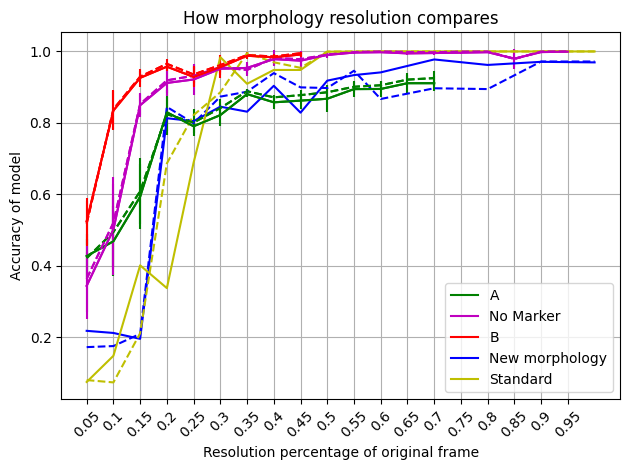

In [114]:
import numpy as np
import matplotlib.pyplot as plt
XA=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XA_accuracy_res.npy")
XB=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XB_accuracy_res.npy")
X0=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/X0M_accuracy_res.npy")
NM_Train=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/train_resolutions_NM.npy")
ST=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/train_resolutions.npy")
old_key=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,1]
new_key=np.arange(0.05,1,0.05)
print(ST.shape,XA.shape)

mean_0 = np.average(XA, axis=1)[:, 0]
std_0 = np.std(XA, axis=1)[:, 0]
mean_1 = np.average(XA, axis=1)[:, 1]
std_1 = np.std(XA, axis=1)[:, 1]
plt.plot(new_key[0:len(mean_0)],mean_0,c="g",label="A")
plt.plot(new_key[0:len(mean_1)],mean_1,"--",c="g")
plt.errorbar(new_key[0:len(mean_0)], mean_0, yerr=std_0, fmt='-g')
plt.errorbar(new_key[0:len(mean_1)], mean_1, yerr=std_1, fmt='--g')

mean_0 = np.average(X0, axis=1)[:, 0]
std_0 = np.std(X0, axis=1)[:, 0]
mean_1 = np.average(X0, axis=1)[:, 1]
std_1 = np.std(X0, axis=1)[:, 1]
plt.plot(new_key,mean_0,c="m",label="No Marker")
plt.plot(new_key,mean_1,"--",c="m")
plt.errorbar(new_key, mean_0, yerr=std_0, fmt='-m')
plt.errorbar(new_key, mean_1, yerr=std_1, fmt='--m')

mean_0 = np.average(XB, axis=1)[:, 0]
std_0 = np.std(XB, axis=1)[:, 0]
mean_1 = np.average(XB, axis=1)[:, 1]
std_1 = np.std(XB, axis=1)[:, 1]
plt.plot(new_key[0:len(mean_0)],mean_0,c="r",label="B")
plt.plot(new_key[0:len(mean_1)],mean_1,"--",c="r")
plt.errorbar(new_key[0:len(mean_0)], mean_0, yerr=std_0, fmt='-r')
plt.errorbar(new_key[0:len(mean_1)], mean_1, yerr=std_1, fmt='--r')

plt.plot(old_key,NM_Train[:,0],c="b",label="New morphology")
plt.plot(old_key,NM_Train[:,1],"--",c="b")
#plt.errorbar(old_key, NM_Train[:,1], yerr=NM_Train[:,2], fmt='--b')

plt.plot(old_key,ST[:,0],c="y",label="Standard")
plt.plot(old_key,ST[:,1],"--",c="y")
#plt.errorbar(old_key, ST[:,1], yerr=ST[:,2], fmt='--m')

plt.grid(True)
plt.xticks([i for i in np.arange(0.05,1,0.05)],[round(i,2) for i in np.arange(0.05,1,0.05)],rotation=45)
plt.xlabel("Resolution percentage of original frame")
plt.ylabel("Accuracy of model")
plt.title("How morphology resolution compares")
plt.tight_layout()
plt.legend(loc="lower right")
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/morph_res.pdf")
plt.show()

## marker correlation 

In [ ]:
#load in ata samples
import numpy as np
save_path="/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/"

XA=np.load(save_path+"X_data_morphoholyA.npy").astype(np.uint8)#.reshape((41*200,20,355,328))
mask = np.any(XA != 0, axis=(1, 2, 3))
XA = XA[mask]
mask = np.any(XA != 1, axis=(1, 2, 3))
XA = XA[mask]
XA=XA[0:300]

XB=np.load(save_path+"X_data_morphoholyB.npy").astype(np.uint8)#.reshape((41*200,20,355,328))
mask = np.any(XB != 0, axis=(1, 2, 3))
XB = XB[mask]
mask = np.any(XB != 1, axis=(1, 2, 3))
XB = XB[mask]
XB=XB[0:300]

X0=np.load(save_path+"X_data_morphoholy0M.npy").astype(np.uint8)#.reshape((41*200,20,355,328))
mask = np.any(X0 != 0, axis=(1, 2, 3))
X0 = X0[mask]
mask = np.any(X0 != 1, axis=(1, 2, 3))
X0 = X0[mask]
X0=X0[0:300]

XNM=np.load(save_path+"X_data_newMorph.npz")['arr_0'].astype(np.uint8)#.reshape((41*200,20,355,328))
mask = np.any(XNM != 0, axis=(1, 2, 3))
XNM = XNM[mask]
mask = np.any(XNM != 1, axis=(1, 2, 3))
XNM = XNM[mask]
XNM=XNM[0:300]

In [ ]:
print(XA.shape,XNM.shape)

(300, 20, 355, 328) (300, 20, 110, 120)


In [121]:
XAr=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XA_accuracy_res.npy")
XBr=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XB_accuracy_res.npy")
X0r=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/X0M_accuracy_res.npy")
NMr=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/train_resolutions_NM.npy")
STr=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/train_resolutions.npy")

In [118]:
import cv2
def adaptive_threshold_array(images, max_value=255, method=cv2.ADAPTIVE_THRESH_MEAN_C,
                             threshold_type=cv2.THRESH_BINARY, block_size=11, C=2,resolution=1):
    n, frames, width, height = images.shape
    w=int(110*resolution)
    h=int(120*resolution)
    output = np.empty((n,frames,w,h), dtype=np.uint8)

    for i in range(n):
        for j in range(frames):
            img = images[i, j]
            img = cv2.resize(img,(110,120),interpolation=cv2.INTER_AREA)
            img = cv2.resize(img,(h,w),interpolation=cv2.INTER_AREA)
            # Normalize to uint8 if needed
            if img.dtype != np.uint8:
                img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            # --- Apply Sobel filter ---
            grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
            grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
            grad_mag = np.sqrt(grad_x**2 + grad_y**2)

            # Normalize gradient magnitude to uint8
            grad_mag = cv2.normalize(grad_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            # --- Apply adaptive threshold ---
            thresh = cv2.adaptiveThreshold(
                grad_mag, max_value, method, threshold_type, block_size, C
            )

            # Invert the binary output if desired
            output[i, j] =  thresh

    return output
#binary threshold 
XA_B=adaptive_threshold_array(XA)
XB_B=adaptive_threshold_array(XB)
X0_B=adaptive_threshold_array(X0)
XNM_B=adaptive_threshold_array(XNM)
#count white vs black 
XA_B5=adaptive_threshold_array(XA,resolution=0.05)
XB_B5=adaptive_threshold_array(XB,resolution=0.05)
X0_B5=adaptive_threshold_array(X0,resolution=0.05)
XNM_B5=adaptive_threshold_array(XNM,resolution=0.05)


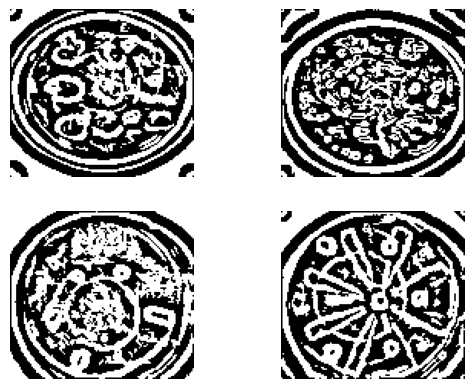

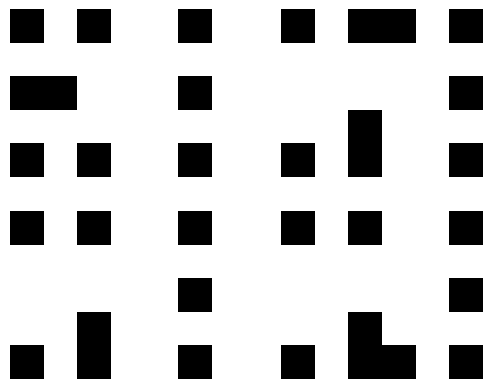

In [119]:
import matplotlib.pyplot as plt 
 
plt.subplot(2,2,1)
plt.imshow(XA_B[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(XB_B[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(X0_B[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(XNM_B[0][0],cmap="gray")
plt.axis("off")
plt.show()

plt.subplot(2,2,1)
plt.imshow(XA_B5[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(XB_B5[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(X0_B5[0][0],cmap="gray")
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(XNM_B5[0][0],cmap="gray")
plt.axis("off")
plt.show()

In [123]:
import pandas as pd 


def countwhite(X):
    n, f, w, h = X.shape
    total_images = n * f
    white_per_image = (X == 255).reshape(total_images, -1).mean(axis=1) * 100
    return white_per_image.mean()
def stdwhite(X):
    n, f, w, h = X.shape
    total_images = n * f
    white_per_image = (X == 255).reshape(total_images, -1).mean(axis=1)
    return white_per_image.std()
frame = pd.DataFrame({
    "Morphology":["A","B","C","D","No marker","New"],
    "Average white":[countwhite(XA_B),countwhite(XB_B),0,0,countwhite(X0_B),countwhite(XNM_B)],
    "Average white 5%":[countwhite(XA_B5),countwhite(XB_B5),0,0,countwhite(X0_B5),countwhite(XNM_B5)],
    "STD white":[stdwhite(XA_B),stdwhite(XB_B),0,0,stdwhite(X0_B),stdwhite(XNM_B)],
    "5% Res accuracy":[np.average(XAr[0],axis=0)[0]*100,np.average(XBr[0],axis=0)[0]*100,0,0,np.average(X0r[0],axis=0)[0]*100,NMr[0][0]*100]
})

frame

,Morphology,Average white,Average white 5%,STD white,5% Res accuracy
0,A,44.902962,69.700556,0.004192,42.773310
1,B,43.205245,65.904444,0.009514,52.518435
2,C,0.000000,0.000000,0.000000,0.000000
3,D,0.000000,0.000000,0.000000,0.000000
4,No marker,51.360975,72.402778,0.016695,34.460923
5,New,46.038577,70.141111,0.002124,21.863053


In [70]:
NMr.shape

(16, 3)